# Heart Disease Stage Prediction Project  

## Project Overview  
The **Heart Disease Stage Prediction Project** focuses on predicting the presence and stages of heart disease based on patient data. Using machine learning models and exploratory data analysis, this project aims to identify key factors contributing to heart disease, assist in early diagnosis, and provide actionable insights for healthcare providers.  

---

## Context  
This dataset is a **multivariate dataset**, meaning it involves various mathematical or statistical variables. It contains 14 primary attributes out of 76 available ones, which have been widely used in machine learning research.  
The **Cleveland database** is the most commonly utilized subset for heart disease prediction tasks.  

The main goals of this project are:  
1. To predict whether a person has heart disease based on given attributes.  
2. To analyze the dataset for insights that could improve understanding and early detection of heart disease.  

---

## Data Source

This dataset is available on Kaggle in the following link:
> https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

## About the Dataset  

### Column Descriptions  

| Column     | Description                                                                                       |
|------------|---------------------------------------------------------------------------------------------------|
| `id`       | Unique identifier for each patient.                                                              |
| `age`      | Age of the patient in years.                                                                      |
| `origin`   | Place of study where data was collected.                                                          |
| `sex`      | Gender of the patient (`Male`/`Female`).                                                          |
| `cp`       | Chest pain type (`typical angina`, `atypical angina`, `non-anginal`, `asymptomatic`).              |
| `trestbps` | Resting blood pressure (in mm Hg on admission to the hospital).                                   |
| `chol`     | Serum cholesterol level in mg/dl.                                                                 |
| `fbs`      | Fasting blood sugar (`True` if >120 mg/dl, else `False`).                                          |
| `restecg`  | Resting electrocardiographic results (`normal`, `st-t abnormality`, `lv hypertrophy`).            |
| `thalach`  | Maximum heart rate achieved during exercise.                                                      |
| `exang`    | Exercise-induced angina (`True`/`False`).                                                         |
| `oldpeak`  | ST depression induced by exercise relative to rest.                                               |
| `slope`    | Slope of the peak exercise ST segment.                                                            |
| `ca`       | Number of major vessels (0-3) colored by fluoroscopy.                                             |
| `thal`     | Results of the thalassemia test (`normal`, `fixed defect`, `reversible defect`).                  |
| `num`      | Predicted attribute (`0` = no heart disease; `1, 2, 3, 4` = stages of heart disease).             |

---

## Problem Statement
   - **Examine Relationships:** Explore correlations between features to identify which variables may be influential predictors for our target variable.

### Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

### Settings

In [54]:
# warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# DataFrame
pd.set_option("display.max_columns", None)

# Data
data_path = "../data"
csv_path = os.path.join(data_path, "hd_uci_cleaned.csv")

### Load Data

In [55]:
df = pd.read_csv(csv_path)

In [56]:
# Check Data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Target Analysis

Analyze the target variable(**num**) which represents the presence of heart disease.

Percentage Distribution of Target Variable:
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


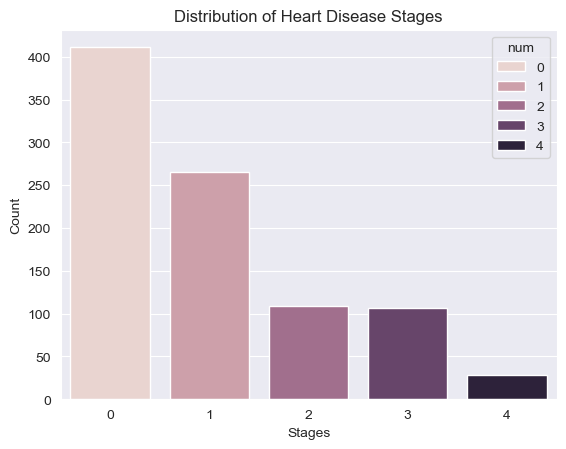

In [57]:
# Check class imbalance
num_percentage = df["num"].value_counts(normalize= True) * 100
print("Percentage Distribution of Target Variable:")
print(num_percentage)

# Visualize Distribution of target
sns.countplot(data= df, x= "num", hue= "num")
plt.title("Distribution of Heart Disease Stages")
plt.xlabel("Stages")
plt.ylabel("Count")
plt.show()


Percentage Distribution for Binary Target:
binary_target
1    55.326087
0    44.673913
Name: proportion, dtype: float64


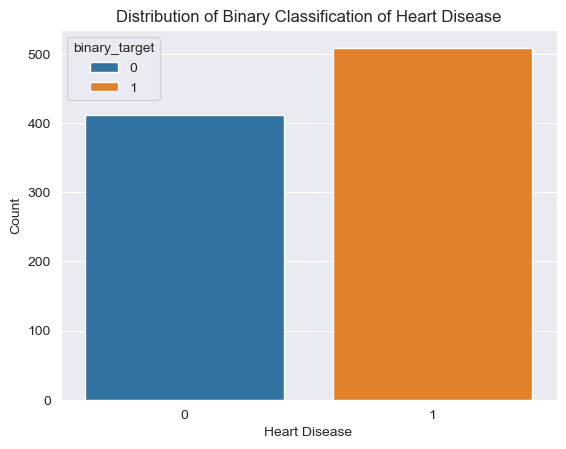

In [58]:
# Convert to binary classification for simpler analysis
df['binary_target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
binary_counts = df['binary_target'].value_counts(normalize=True) * 100
print("\nPercentage Distribution for Binary Target:")
print(binary_counts)

# Visualize Distribution of target(binary classification)
sns.countplot(data= df, x= "binary_target", hue= "binary_target")
plt.title("Distribution of Binary Classification of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

### Target Variable Analysis Insights

#### **Percentage Distribution of Target Variable (`num`):**
- The majority of patients fall into **`num=0` (No Heart Disease)**, accounting for **44.67%** of the dataset.
- Among patients with heart disease stages (`num=1, 2, 3, 4`):
  - **`num=1`** is the most prevalent stage, comprising **28.80%** of the dataset.
  - **`num=2`** and **`num=3`** are relatively balanced, with **11.85%** and **11.63%**, respectively.
  - **`num=4`** (severe heart disease) is the least common, with only **3.04%** of the dataset.

#### **Percentage Distribution for Binary Target (`binary_target`):**
- When converting the target into a binary classification:
  - **`binary_target=1` (Heart Disease)** accounts for **55.33%** of the dataset.
  - **`binary_target=0` (No Heart Disease)** accounts for **44.67%** of the dataset.
- The binary target shows a relatively balanced distribution with a slight majority of cases having heart disease.

#### **Key Observations:**
- The dataset exhibits a moderate class imbalance in the multi-class target (`num`), with **`num=4`** being underrepresented.
- The binary target (`binary_target`) is more balanced and suitable for binary classification tasks, making it an attractive option for predictive modeling.
- The prevalence of `num=1` highlights that mild heart disease is the most common stage among patients with heart conditions.

#### **Implications for Analysis and Modeling:**
- The class imbalance in `num` should be addressed using techniques such as SMOTE or class weighting during model training.
- Binary classification models might yield better generalization due to the balanced distribution of `binary_target`.
- Further analysis should explore feature relationships with both the multi-class and binary targets to understand patterns in heart disease progression.


### Age Analysis

Anlyze the distribution of age and how stages of heart disease is influenced with different ages of patients.

In [59]:
# Find Statistical Info of Age
col= "age"
age_stats = df[col].describe()
print(f"{col.upper()} STATISTICS")
print(age_stats)

AGE STATISTICS
count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


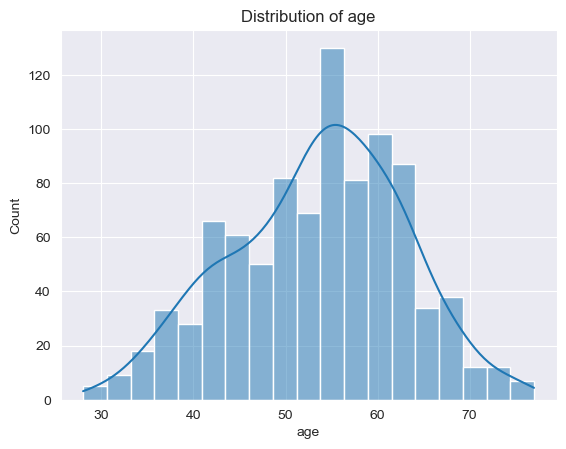

In [60]:
# Visualize Distribution of Age
sns.histplot(data= df, x= col, kde= True)
plt.title(f"Distribution of {col}")
plt.show()

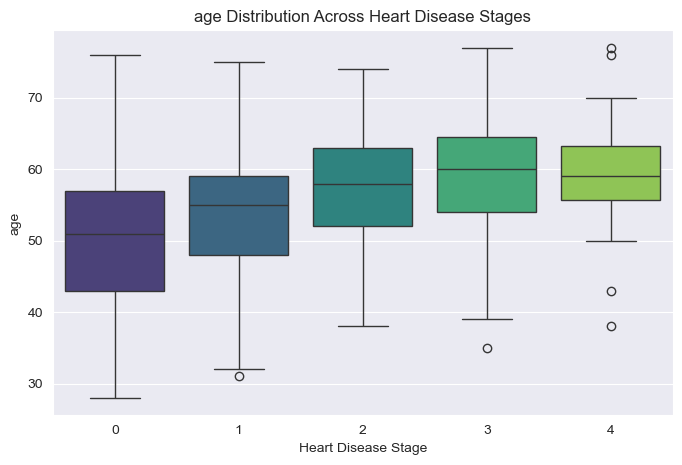

In [61]:
# Relationship of Age with target
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y=col, data=df, palette='viridis')
plt.title(f'{col} Distribution Across Heart Disease Stages')
plt.xlabel('Heart Disease Stage')
plt.ylabel(col)
plt.show()

### Age Analysis Insights

#### **Descriptive Statistics of Age:**
- **Count:** The dataset includes 920 observations for the `age` feature.
- **Mean Age:** The average age is approximately **53.51 years**, indicating that the dataset predominantly represents middle-aged individuals.
- **Standard Deviation:** The standard deviation is **9.42 years**, suggesting a moderate spread in the ages.
- **Minimum Age:** The youngest individual in the dataset is **28 years old**.
- **Maximum Age:** The oldest individual in the dataset is **77 years old**.
- **Quartiles:**
  - **25th Percentile:** 25% of the individuals are younger than **47 years**.
  - **50th Percentile (Median):** The median age is **54 years**.
  - **75th Percentile:** 75% of the individuals are younger than **60 years**.

#### **Insights from the Box Plot:**
- The age distribution shows a clear trend across heart disease stages:
  - Individuals in **stage 0 (No Heart Disease)** have a slightly wider age range, with younger patients included.
  - The median age increases with higher heart disease stages, suggesting that older individuals are more likely to develop advanced stages of heart disease.
  - **Stage 4 (Severe Heart Disease)** has the smallest interquartile range, indicating that the affected individuals are concentrated within a narrower age group.

#### **Key Observations:**
- Age is a significant factor associated with heart disease progression. The likelihood of severe heart disease increases with age.
- Patients in **stage 0** (No Heart Disease) tend to have a broader age distribution, potentially reflecting a mix of younger and middle-aged individuals with healthier cardiovascular profiles.
- Outliers in the higher stages (e.g., younger individuals with stage 3 or stage 4) may indicate unique cases of early-onset heart disease due to genetic or lifestyle factors.

#### **Implications:**
- Age should be considered a critical variable in predictive modeling for heart disease risk.
- Preventive measures should focus on middle-aged and older populations to mitigate heart disease progression.
- Further analysis could explore the interaction between age and other risk factors (e.g., cholesterol, blood pressure) to identify high-risk profiles.


### Gender Analysis

Analyze how different stages of heart disease affects the male and female.

Gender Analysis
sex  Female  Male
num              
0       144   267
1        30   235
2        10    99
3         8    99
4         2    26


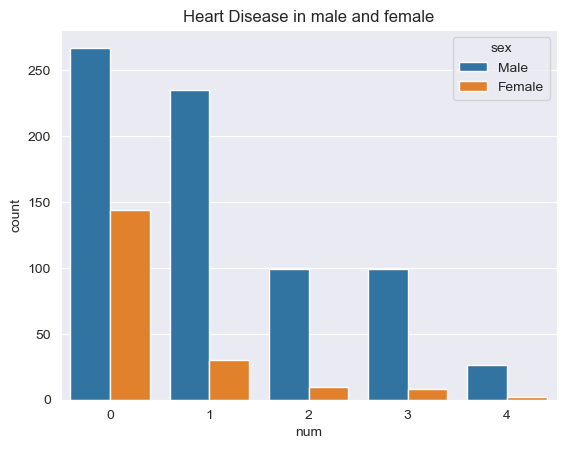

In [62]:
# Count target by gender
col = "sex"
gender_count = df.groupby(["num", col]).size().unstack()
print("Gender Analysis")
print(gender_count)

# Visualize
sns.countplot(data= df, x= "num", hue= col)
plt.title("Heart Disease in male and female")
plt.show()

### Gender Analysis Insights

- **Stage 0 (No Heart Disease):**
  - **Female:** 144 patients
  - **Male:** 267 patients
  - **Insight:** Males represent a significantly higher proportion (65%) of patients with no heart disease compared to females (35%).

- **Stage 1 (Mild Heart Disease):**
  - **Female:** 30 patients
  - **Male:** 235 patients
  - **Insight:** Males dominate this stage with a significant majority (89%), while females constitute only 11%.

- **Stage 2 (Moderate Heart Disease):**
  - **Female:** 10 patients
  - **Male:** 99 patients
  - **Insight:** Males are over 9 times more likely to be in Stage 2 than females, indicating a strong gender disparity in moderate heart disease.

- **Stage 3 (Severe Heart Disease):**
  - **Female:** 8 patients
  - **Male:** 99 patients
  - **Insight:** Males account for the vast majority (93%) of patients in this stage, with females making up only 7%.

- **Stage 4 (Critical Heart Disease):**
  - **Female:** 2 patients
  - **Male:** 26 patients
  - **Insight:** Males comprise 93% of critical heart disease cases, while females represent only 7%, indicating a highly skewed gender distribution at this stage.

### Key Observations:
- Across all stages of heart disease, males consistently outnumber females.
- The disparity becomes more pronounced in advanced stages (Stages 2, 3, and 4), where males overwhelmingly represent the majority of patients.
- This suggests that males may either have a higher predisposition to developing heart disease or are more likely to progress to advanced stages than females. Further analysis is needed to explore the underlying causes, such as lifestyle factors, genetic predisposition, or healthcare-seeking behavior.


### Resting Blood Pressure Analysis

Analyze the distribution of resting blood pressure (trestbps) and how it influences the different stages of heart disease.

TRESTBPS STATISTICS
count    920.000000
mean     131.995652
std       18.451300
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


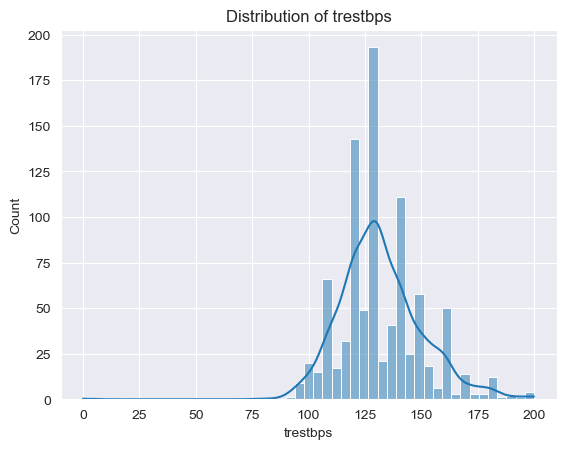

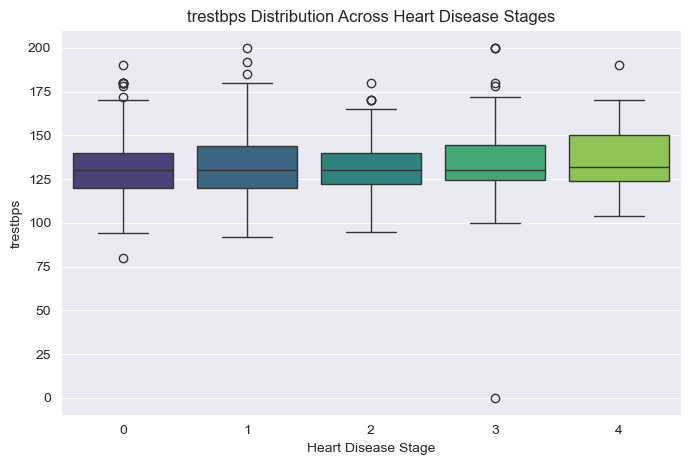

In [63]:
# Find Statistical Info of BP
col= "trestbps"
bp_stats = df[col].describe()
print(f"{col.upper()} STATISTICS")
print(bp_stats)

# Visualize Distribution of Age
sns.histplot(data= df, x= col, kde= True)
plt.title(f"Distribution of {col}")
plt.show()

# Relationship of BP with target
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y=col, data=df, palette='viridis')
plt.title(f'{col} Distribution Across Heart Disease Stages')
plt.xlabel('Heart Disease Stage')
plt.ylabel(col)
plt.show()

### Resting Blood Pressure (trestbps) Analysis

#### Statistical Summary:
- **Count:** 920 observations
- **Mean:** 131.99 mm Hg
- **Standard Deviation:** 18.45 mm Hg
- **Minimum:** 0 mm Hg (likely erroneous or missing value)
- **25th Percentile:** 120 mm Hg
- **Median (50th Percentile):** 130 mm Hg
- **75th Percentile:** 140 mm Hg
- **Maximum:** 200 mm Hg

#### Observations from the Boxplot:
- **Stage 0 (No Heart Disease):**
  - Resting blood pressure is relatively stable, with the majority of values clustered around the median (~130 mm Hg). 
  - Few outliers below the 100 mm Hg mark suggest potential erroneous or rare data points.

- **Stages 1 to 4 (Heart Disease Stages):**
  - An increasing trend in median resting blood pressure is observed with advanced heart disease stages.
  - The interquartile range (IQR) widens slightly in later stages, indicating increased variability in resting blood pressure levels.
  - Outliers above 175 mm Hg are present across all stages, but their frequency increases in advanced stages.

#### Key Insights:
1. **Progression Trend:**
   - Patients with more advanced heart disease stages tend to have higher median resting blood pressure levels, suggesting a potential correlation between elevated blood pressure and disease severity.

2. **Data Quality Concerns:**
   - The presence of a minimum value of 0 mm Hg likely indicates a data entry error or missing value, requiring further investigation or imputation.

3. **Clinical Implications:**
   - High resting blood pressure levels could serve as an important indicator for assessing heart disease risk and its progression.
   - Consistent monitoring of resting blood pressure is critical for early detection and management of heart disease.

4. **Outliers:**
   - Extreme values, both high and low, could indicate additional underlying conditions or measurement inaccuracies.

#### Recommendations:
- Address the erroneous values (e.g., 0 mm Hg) through imputation or exclusion.
- Further analysis could investigate the relationship between resting blood pressure and other key features such as cholesterol, age, and maximum heart rate.


In [64]:
# Remove the data containing 0 Blood Pressure
index = list(df[df["trestbps"] == 0].index)
df.drop(index, inplace= True)
# Sanity check
df[df["trestbps"] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,binary_target


### Cholestoral Level Analysis

Analyze the distribution of cholestoral level(chol) and how it influences the different stages of heart disease.

CHOL STATISTICS
count    919.000000
mean     200.126224
std      108.899633
min        0.000000
25%      178.500000
50%      223.000000
75%      267.000000
max      603.000000
Name: chol, dtype: float64


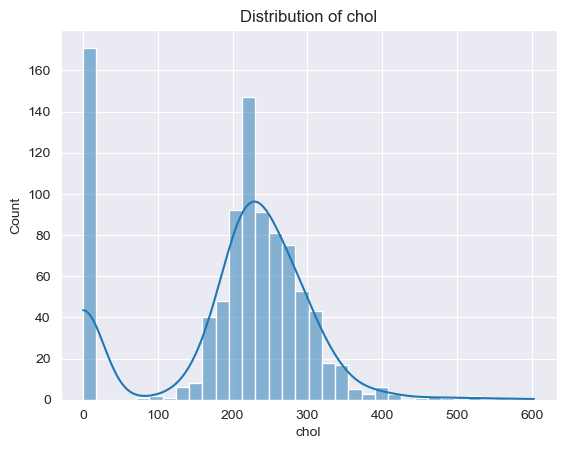

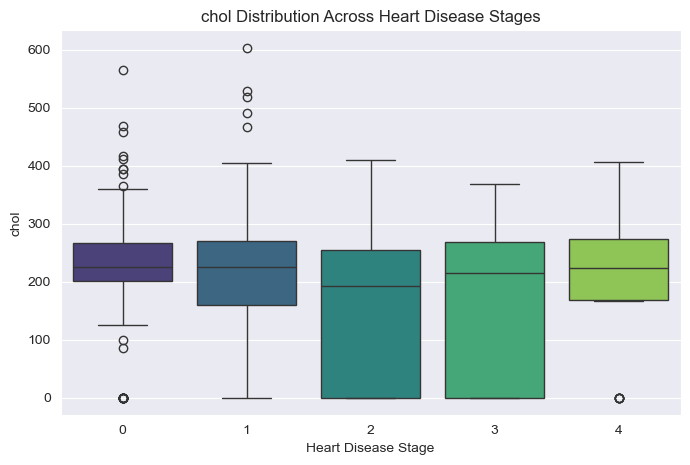

In [65]:
# Find Statistical Info of BP
col= "chol"
chol_stats = df[col].describe()
print(f"{col.upper()} STATISTICS")
print(chol_stats)

# Visualize Distribution of Cholestoral
sns.histplot(data= df, x= col, kde= True)
plt.title(f"Distribution of {col}")
plt.show()

# Relationship of Cholestoral with target
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y=col, data=df, palette='viridis')
plt.title(f'{col} Distribution Across Heart Disease Stages')
plt.xlabel('Heart Disease Stage')
plt.ylabel(col)
plt.show()

### Cholesterol (chol) Analysis

#### Statistical Summary:
- **Count:** 919 observations
- **Mean:** 200.13 mg/dl
- **Standard Deviation:** 108.90 mg/dl
- **Minimum:** 0 mg/dl (indicates missing or erroneous entries, found in 171 rows)
- **25th Percentile:** 178.5 mg/dl
- **Median (50th Percentile):** 223 mg/dl
- **75th Percentile:** 267 mg/dl
- **Maximum:** 603 mg/dl

#### Observations from the Boxplot:
- **Stage 0 (No Heart Disease):**
  - Median cholesterol level is slightly lower compared to patients with heart disease stages.
  - Several outliers are observed above 400 mg/dl, indicating extreme cholesterol levels.

- **Stages 1 to 4 (Heart Disease Stages):**
  - Median cholesterol levels increase slightly with advanced heart disease stages.
  - The interquartile range (IQR) expands, particularly in stages 2 and 3, suggesting greater variability in cholesterol levels among these groups.
  - Extreme outliers above 500 mg/dl are present across all stages.

#### Key Insights:
1. **Erroneous Data:**
   - The presence of 171 rows with cholesterol levels of 0 indicates missing or incorrect data. These need to be imputed or excluded to ensure accurate analysis.

2. **Correlation with Heart Disease Stages:**
   - Cholesterol levels tend to increase with advanced stages of heart disease, highlighting its importance as a risk factor.
   - The higher median and broader range in advanced stages suggest that cholesterol levels are a crucial indicator for disease severity.

3. **Outliers:**
   - Extremely high cholesterol levels (above 400 mg/dl) are present in all stages and should be further examined to understand their clinical significance.

4. **Clinical Implications:**
   - High cholesterol is a well-established risk factor for heart disease. Patients with elevated levels should consider lifestyle changes and medical interventions to mitigate risks.

#### Recommendations:
- Impute or exclude rows with cholesterol levels of 0 to ensure the validity of further analyses.
- Investigate the relationship between cholesterol and other factors such as age, resting blood pressure, and heart disease stage.
- Use cholesterol levels as a key predictor in machine learning models for heart disease risk prediction.

#### Boxplot Interpretation:
- The attached chart effectively visualizes the distribution of cholesterol levels across different stages of heart disease. It highlights the increasing trend and variability with disease progression.


In [66]:
# Impute the 0 cholestoral level with median of the feature
df["chol"] = df["chol"].apply( lambda x: df["chol"].median() if x== 0 else x) 

### Maximum Heart Rate Analysis
Analyze how maximum heart rate influences the risk of heart disease.

THALCH STATISTICS
count    919.000000
mean     137.673558
std       25.152434
min       60.000000
25%      120.000000
50%      140.000000
75%      156.000000
max      202.000000
Name: thalch, dtype: float64


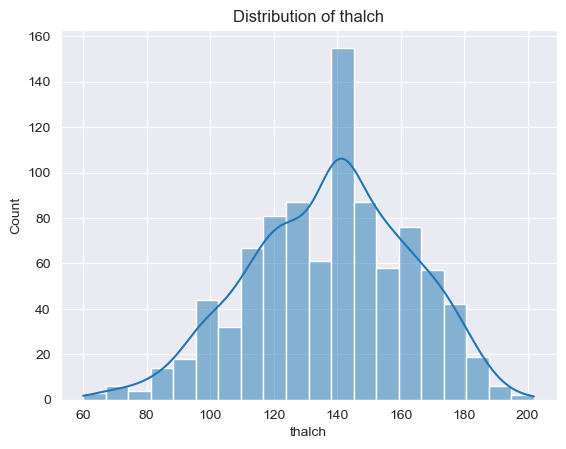

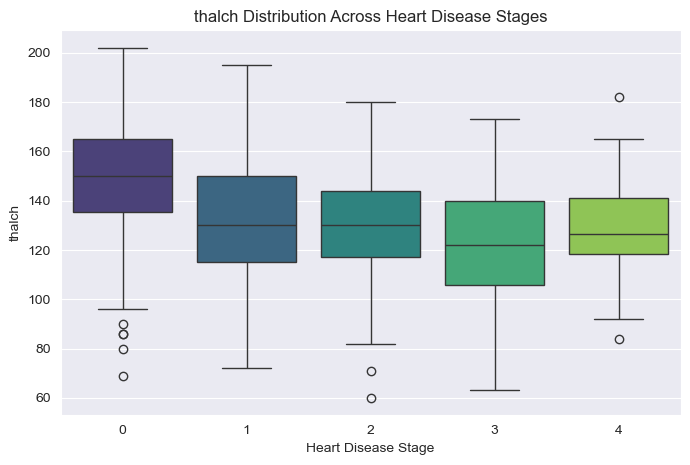

In [67]:
# Find Statistical Info of Max. Heart Rate
col= "thalch"
thalach_stats = df[col].describe()
print(f"{col.upper()} STATISTICS")
print(thalach_stats)

# Visualize Distribution of Cholestoral
sns.histplot(data= df, x= col, kde= True)
plt.title(f"Distribution of {col}")
plt.show()

# Relationship of Cholestoral with target
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y=col, data=df, palette='viridis')
plt.title(f'{col} Distribution Across Heart Disease Stages')
plt.xlabel('Heart Disease Stage')
plt.ylabel(col)
plt.show()

### Maximum Heart Rate (thalach) Analysis

#### Statistical Summary:
- **Count:** 919 observations
- **Mean:** 137.68 bpm
- **Standard Deviation:** 25.13 bpm
- **Minimum:** 60 bpm
- **25th Percentile:** 120 bpm
- **Median (50th Percentile):** 140 bpm
- **75th Percentile:** 156 bpm
- **Maximum:** 202 bpm

#### Observations from the Boxplot:
- **Stage 0 (No Heart Disease):**
  - Higher median heart rate compared to stages with heart disease.
  - A narrower range of maximum heart rate values is observed.
  - Outliers with very low heart rates are present, which may need further investigation.

- **Stages 1 to 4 (Heart Disease Stages):**
  - Median heart rate progressively decreases with higher heart disease stages.
  - The interquartile range (IQR) reduces, especially in advanced stages, indicating less variability in maximum heart rate for patients with severe heart disease.
  - More outliers with lower maximum heart rates are observed in advanced stages, reflecting the impact of heart disease on heart rate capacity.

#### Key Insights:
1. **Decreasing Maximum Heart Rate:**
   - The maximum heart rate achieved tends to decline with increasing heart disease severity, which aligns with clinical knowledge about reduced exercise capacity in heart disease patients.

2. **Outliers:**
   - There are significant outliers with very low maximum heart rates across all stages, especially in advanced stages. These may represent patients with severe heart conditions or comorbidities.

3. **Clinical Implications:**
   - Maximum heart rate is a vital indicator of cardiovascular health. A decline in heart rate capacity could signal worsening heart disease or reduced physical fitness.
   - Monitoring maximum heart rate during stress tests could help in early detection and management of heart conditions.

4. **Recommendations:**
   - Investigate outliers with extremely low maximum heart rates to understand their underlying causes.
   - Use maximum heart rate as a key predictor in building machine learning models for heart disease classification and risk prediction.

#### Boxplot Interpretation:
- The attached boxplot effectively visualizes the relationship between maximum heart rate and heart disease stages. It highlights the declining trend and increased presence of lower outliers in advanced stages.


### Fasting Blood Sugar Analysis

Analyze how presence of fasting blood sugar affects the cause of heart disease.

Fasting Blood Sugar Analysis
fbs  False  True 
num              
0      367     44
1      226     39
2       86     23
3       79     27
4       23      5


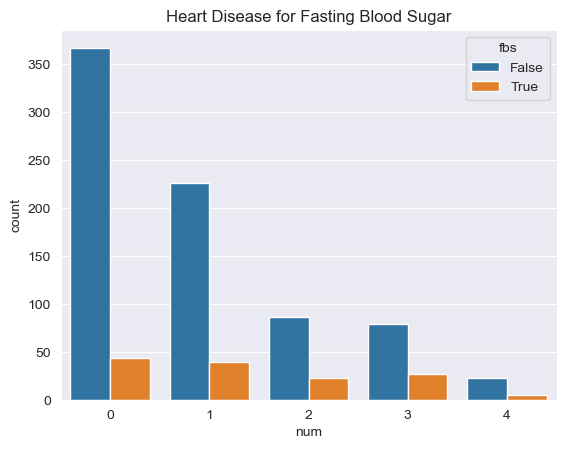

In [68]:
# Count target by fasting blood sugar
col = "fbs"
fbs_count = df.groupby(["num", col]).size().unstack()
print("Fasting Blood Sugar Analysis")
print(fbs_count)

# Visualize
sns.countplot(data= df, x= "num", hue= col)
plt.title("Heart Disease for Fasting Blood Sugar")
plt.show()

### Fasting Blood Sugar (fbs) Analysis

#### Observations from the Bar Chart:
- **General Trend:**
  - The majority of patients across all heart disease stages have fasting blood sugar levels less than 120 mg/dL (FBS False).
  - A smaller proportion of patients exhibit fasting blood sugar levels above 120 mg/dL (FBS True).

- **Stage-wise Analysis:**
  - In Stage 0 (No Heart Disease), only 44 out of 411 patients have elevated fasting blood sugar levels (10.7%).
  - For Stages 1 and 2, the proportion of patients with FBS True increases slightly but remains relatively low.
  - Stages 3 and 4 show a similar trend, with FBS True being less common.

#### Key Insights:
1. **Low Prevalence of Elevated FBS:**
   - Elevated fasting blood sugar (FBS > 120 mg/dL) is less prevalent across all heart disease stages.
   - This suggests that while FBS is an important feature, it may not be the most dominant indicator for heart disease severity.

2. **Stage 0 Distinction:**
   - Patients without heart disease (Stage 0) show the highest count of FBS False cases, suggesting better glucose regulation.

3. **Clinical Implications:**
   - Monitoring blood sugar levels remains crucial as high FBS is a risk factor for cardiovascular diseases.
   - However, FBS alone may not be a strong predictor of heart disease stages.

#### Recommendations:
- Consider combining FBS with other features (e.g., cholesterol, maximum heart rate) to enhance predictive modeling for heart disease.
- Investigate the relationship between FBS True cases and other comorbidities, such as diabetes, to understand their combined impact on heart disease.


### Chest Pain Type Analysis

Analyse how chest pain type cause the different stages of heart disease

Chest Pain Type Analysis
cp   asymptomatic  atypical angina  non-anginal  typical angina
num                                                            
0           104.0            150.0        131.0            26.0
1           197.0             19.0         37.0            12.0
2            89.0              2.0         14.0             4.0
3            83.0              3.0         17.0             3.0
4            23.0              NaN          4.0             1.0


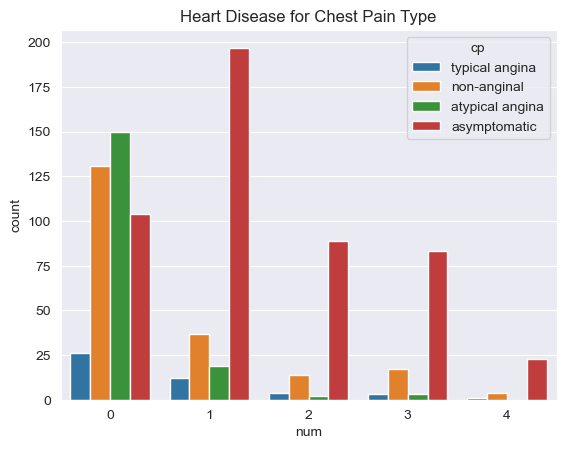

In [69]:
# Count target by chest pain type
col = "cp"
cp_count = df.groupby(["num", col]).size().unstack()
print("Chest Pain Type Analysis")
print(cp_count)

# Visualize
sns.countplot(data= df, x= "num", hue= col)
plt.title("Heart Disease for Chest Pain Type")
plt.show()

### Chest Pain Type Analysis

#### Observations from the Bar Chart:
1. **Dominant Chest Pain Type Across Stages:**
   - "Asymptomatic" chest pain type is the most prevalent for patients with higher heart disease stages (Stages 1-4).
   - In Stage 0 (no heart disease), there is a relatively balanced distribution among "Atypical Angina," "Non-Anginal," and "Asymptomatic" chest pain types.

2. **Stage-Wise Analysis:**
   - Stage 0 shows a higher prevalence of "Atypical Angina" and "Non-Anginal" types compared to "Typical Angina."
   - As the heart disease stage progresses, "Asymptomatic" cases dominate significantly, especially in Stages 1-4.
   - "Typical Angina" is the least common type across all stages.

3. **Missing Data:**
   - There are missing values for "Atypical Angina" in Stage 4.

#### Key Insights:
1. **Asymptomatic Cases as Indicators:**
   - The high prevalence of "Asymptomatic" chest pain in advanced stages (1-4) highlights its significance as a key feature for identifying severe heart conditions.

2. **Reduced Prevalence of "Typical Angina":**
   - "Typical Angina," often associated with classical heart disease symptoms, is rare across all stages, indicating its limited diagnostic presence in this dataset.

3. **Stage 0 Variability:**
   - Patients without heart disease (Stage 0) show more variability in chest pain types, with "Atypical Angina" being particularly frequent.

4. **Clinical Implications:**
   - Special attention should be given to "Asymptomatic" cases during screenings as they may represent latent or severe heart conditions.
   - Atypical and non-anginal chest pain types are more likely in early stages and could warrant further investigation for preventive care.

#### Recommendations:
- Investigate correlations between "Asymptomatic" chest pain and other critical features such as cholesterol levels, fasting blood sugar, or maximum heart rate to improve prediction accuracy.
- Address missing data for "Atypical Angina" in Stage 4 to ensure robust analysis.


### Results of the Thalassemia Test Analysis

Analyse how results of the thalassemia test causes the heart disease

Result of Thalassemia Test Analysis
thal   -1  fixed defect  normal  reversable defect
num                                               
0     224            11     138                 38
1     159            13      30                 63
2      46            12      14                 37
3      44             7      12                 43
4      12             3       2                 11


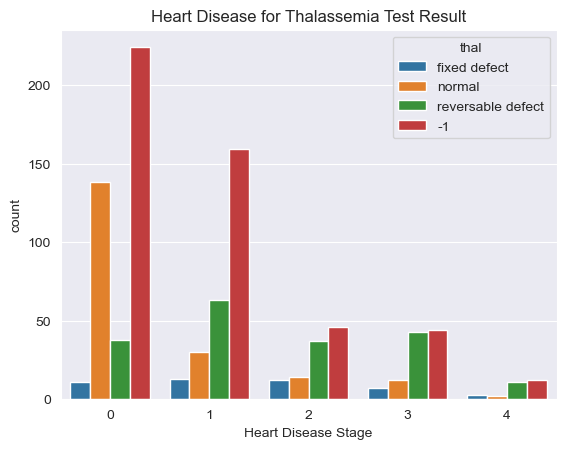

In [70]:
# Count target by thalassemia test
col = "thal"
thal_count = df.groupby(["num", col]).size().unstack()
print("Result of Thalassemia Test Analysis")
print(thal_count)

# Visualize
sns.countplot(data= df, x= "num", hue= col)
plt.title("Heart Disease for Thalassemia Test Result")
plt.xlabel("Heart Disease Stage")
plt.show()

### Thalassemia Test Result Analysis

#### Observations from the Chart:
1. **Dominance of Missing/Undefined Results (-1):**
   - A significant number of cases have a Thalassemia test result of `-1`, particularly in Stage 0 (no heart disease) and Stage 1. 
   - This indicates a potential issue with missing or undefined values for the Thalassemia test.

2. **Reversible Defect Trends:**
   - The "Reversible Defect" result is more frequent in patients with higher heart disease stages (Stages 1-4).
   - It peaks at Stage 3 and remains consistently present across stages, suggesting it is an important indicator for advanced heart disease.

3. **Normal Test Results:**
   - "Normal" results are most common in Stage 0 (no heart disease), but their frequency decreases significantly in higher stages.
   - This suggests that a normal Thalassemia test is associated with a lower likelihood of heart disease.

4. **Fixed Defect Trends:**
   - "Fixed Defect" results are rare across all stages, with minimal representation even in advanced heart disease stages.
   - This result may have limited diagnostic value in this dataset.

#### Key Insights:
1. **Missing Data Impact (-1):**
   - The high prevalence of missing/undefined results (`-1`) in Thalassemia tests reduces the reliability of this feature for diagnosis.
   - Addressing missing data for Thalassemia test results is crucial to enhance analysis accuracy.

2. **Reversible Defect as a Key Indicator:**
   - The strong association of "Reversible Defect" with higher heart disease stages makes it a critical feature for identifying advanced heart disease.

3. **Normal Test Result Correlation:**
   - A "Normal" result strongly correlates with the absence of heart disease (Stage 0). This can be used as a negative indicator for heart disease risk.

#### Recommendations:
- Investigate the reasons for missing/undefined results (`-1`) and attempt to impute or replace them where possible.
- Consider emphasizing "Reversible Defect" as a predictive feature in heart disease models.
- Use "Normal" test results as an inverse indicator for heart disease in early stages (Stage 0).


In [71]:
# Drop the thal feature as it contains -1(undifined or missing) values most of the cases(53%)
df.drop("thal", axis= 1, inplace= True)

### Resting Electrocardiographic(ECG) Results Analysis

Analyse how ECG result indicates the stages of heart disease

Rest ECG Result Analysis
restecg  lv hypertrophy  normal  st-t abnormality
num                                              
0                    82     268                61
1                    45     172                48
2                    22      55                32
3                    26      49                31
4                    13       8                 7


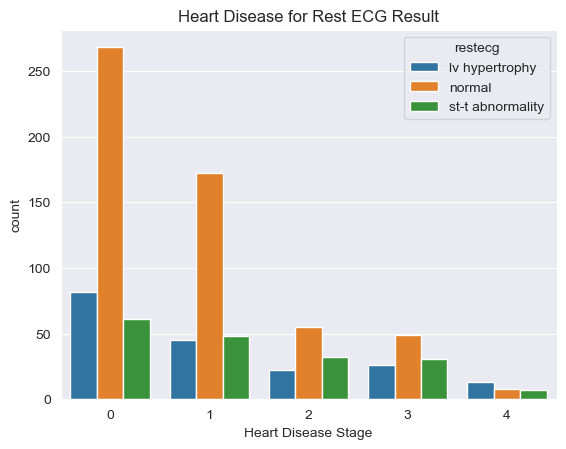

In [76]:
# Count target by ECG test
col = "restecg"
ecg_count = df.groupby(["num", col]).size().unstack()
print("Rest ECG Result Analysis")
print(ecg_count)

# Visualize
sns.countplot(data= df, x= "num", hue= col)
plt.title("Heart Disease for Rest ECG Result")
plt.xlabel("Heart Disease Stage")
plt.show()

### Rest Electrocardiographic (ECG) Result Analysis

#### Observations from the Chart:
1. **Dominance of Normal ECG Results:**
   - "Normal" results are the most frequent in all heart disease stages but significantly dominate in Stage 0 (no heart disease) and Stage 1.
   - This indicates that a normal Rest ECG result correlates with lower heart disease severity.

2. **ST-T Abnormality:**
   - The "ST-T Abnormality" result is relatively more frequent in advanced heart disease stages (Stages 2–4), although its overall count is lower than "Normal."
   - It shows a consistent presence across stages, highlighting its potential association with increasing severity of heart disease.

3. **Left Ventricular Hypertrophy (LV Hypertrophy):**
   - "LV Hypertrophy" results are the least common across all stages but are slightly more represented in Stages 3 and 4.
   - This suggests it might be an indicator in cases of advanced heart disease, albeit with limited representation.

#### Key Insights:
1. **Normal ECG as a Protective Indicator:**
   - A "Normal" Rest ECG result strongly correlates with Stage 0 and Stage 1, indicating lower severity or absence of heart disease.
   - The prevalence of normal results significantly decreases in higher stages, implying its potential as a protective factor.

2. **ST-T Abnormality as a Risk Indicator:**
   - The presence of "ST-T Abnormality" correlates with higher heart disease stages, making it a potential marker of disease progression.
   - Its consistent frequency across stages suggests its importance in diagnosing heart disease severity.

3. **Limited Role of LV Hypertrophy:**
   - "LV Hypertrophy" appears to have limited diagnostic utility due to its low representation across all stages.
   - However, its increased frequency in advanced stages warrants further investigation for potential predictive value in severe heart disease cases.

#### Recommendations:
- Use "Normal" ECG results as a strong negative indicator for early-stage heart disease.
- Emphasize "ST-T Abnormality" as a critical feature in predictive models for advanced heart disease stages.
- Investigate the clinical relevance of "LV Hypertrophy" in severe cases to determine its predictive significance.

### Slope of the Peak Exercise ST Segment Analysis

Analyse how Slope of the peak exercise ST segment indicates the stages of heart disease

Slope of the Peak Exercise ST Segment Analysis
slope   -1  downsloping  flat  upsloping
num                                     
0      193           14    79        125
1       67           15   144         39
2       19           14    57         19
3       26           13    50         17
4        4            7    14          3


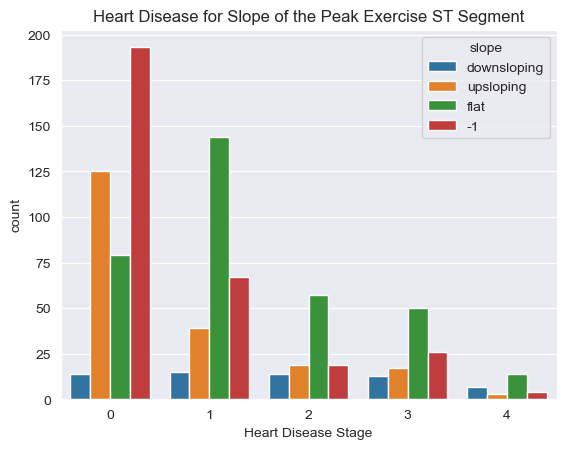

In [77]:
# Count target by Slope of the peak exercise ST segment
col = "slope"
slope_count = df.groupby(["num", col]).size().unstack()
print("Slope of the Peak Exercise ST Segment Analysis")
print(slope_count)

# Visualize
sns.countplot(data= df, x= "num", hue= col)
plt.title("Heart Disease for Slope of the Peak Exercise ST Segment")
plt.xlabel("Heart Disease Stage")
plt.show()

### Slope of the Peak Exercise ST Segment Analysis

#### Observations from the Chart:
1. **High Prevalence of `-1` in Stage 0:**
   - A large number of cases with slope `-1` are observed in Stage 0 (193 instances), indicating an association with no heart disease.
   - Its frequency significantly decreases in higher heart disease stages.

2. **Dominance of "Flat" Slope in Advanced Stages:**
   - The "Flat" slope is most frequent in Stage 1 (144 instances) and continues to have a substantial presence in stages 2, 3, and 4.
   - This suggests that a "Flat" slope is strongly associated with higher heart disease severity.

3. **Moderate Presence of "Upsloping":**
   - The "Upsloping" slope is most common in Stage 0 (125 instances) but declines sharply in subsequent stages.
   - Its low frequency in advanced stages suggests it may be more associated with lower heart disease severity.

4. **Limited Representation of "Downsloping":**
   - "Downsloping" has the lowest frequency across all stages, making it less significant as a distinguishing factor.

#### Key Insights:
1. **Slope `-1` as a Negative Indicator:**
   - The high prevalence of slope `-1` in Stage 0 indicates its potential as a strong negative predictor of heart disease.
   - Its frequency significantly decreases in higher stages, further supporting this observation.

2. **"Flat" Slope as a Risk Indicator:**
   - The "Flat" slope shows a strong correlation with higher heart disease stages, making it a key marker for disease severity.
   - Its consistent representation in stages 1 through 4 highlights its importance in advanced disease diagnosis.

3. **"Upsloping" Slope as a Mild Risk Indicator:**
   - The presence of "Upsloping" slope in Stage 0 suggests a potential association with lower heart disease severity.
   - Its limited representation in advanced stages diminishes its diagnostic value for severe cases.

4. **Minimal Impact of "Downsloping":**
   - The limited frequency of "Downsloping" makes it less useful as a diagnostic or predictive factor.

#### Recommendations:
- Emphasize slope `-1` as a protective indicator in predictive models.
- Use the "Flat" slope as a critical feature for identifying patients with higher heart disease stages.
- Investigate the clinical relevance of "Upsloping" in early-stage heart disease.


In [74]:
# Remove binary_target feature as it was added for target analysis
df.drop("binary_target", axis= 1, inplace= True)

In [75]:
# Save the cleaned data after advance analysis

cleaned_path = os.path.join(data_path, "hd_a_cleaned.csv")
df.to_csv(cleaned_path, index= False)